In [10]:
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
datasetPath = "./dataset/"

#read in config file
with open(datasetPath + 'config.json') as config_file:
    config = json.load(config_file)
# in this example we are only interested in the labels
labels = config['labels']

In [12]:
image_id = 'M2kh294N9c72sICO990Uew'

image_path = datasetPath + "training/images/{}.jpg".format(image_id)
# label_path = datasetPath + "training/labels/{}.png".format(image_id)
instance_path = datasetPath + "training/instances/{}.png".format(image_id)
# panoptic_path = datasetPath + "training/panoptic/{}.png".format(image_id)

base_image = Image.open(image_path)
# label_image = Image.open(label_path)
instance_image = Image.open(instance_path)
# panoptic_image = Image.open(panoptic_path)

In [13]:
# convert labeled data to numpy arrays for better handling
# label_array = np.array(label_image)
instance_array = np.array(instance_image, dtype=np.uint16)

# now we split the instance_array into labels and instance ids
instance_label_array = np.array(instance_array / 256, dtype=np.uint8)
instance_ids_array = np.array(instance_array % 256, dtype=np.uint8)

In [14]:
def apply_color_map(image_array, labels):
    color_array = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)

    for label_id, label in enumerate(labels):
        # set all pixels with the current label to the color of the current label
        color_array[image_array == label_id] = label["color"]

    return color_array

In [15]:
# for visualization, we apply the colors stored in the config
# colored_label_array = apply_color_map(label_array, labels)
colored_instance_label_array = apply_color_map(instance_label_array, labels)

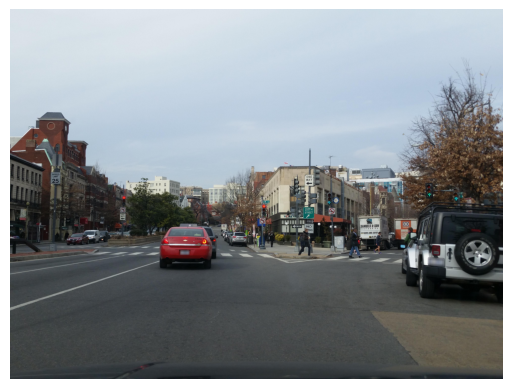

In [19]:
plt.axis('off')
plt.imshow(base_image)

In [52]:
!rm -r sampleDS
!mkdir -p sampleDS/images sampleDS/instances

In [53]:
import glob
import shutil
from pathlib import Path

In [54]:
trainingImages = glob.glob("dataset/training/images/*")

In [55]:
sampleIdxs = np.arange(len(trainingImages)) 
np.random.shuffle(sampleIdxs)
sampleIdxs = sampleIdxs[:1000]

In [56]:
for sampleIdx in sampleIdxs:
    shutil.copy(trainingImages[sampleIdx], "sampleDS/" + "images/")
    
    imageID = Path(trainingImages[sampleIdx]).stem
    shutil.copy("./dataset/training/instances/" + imageID + ".png", "sampleDS/" + "instances/")

In [57]:
!zip -r sampleDS.zip sampleDS/

updating: sampleDS/ (stored 0%)
  adding: sampleDS/images/ (stored 0%)
  adding: sampleDS/images/j7__n4nGaeRrsRhqpqU71Q.jpg (deflated 1%)
  adding: sampleDS/images/-4x3QnUx01ZfYnZPVE9DNA.jpg (deflated 2%)
  adding: sampleDS/images/-5_vD3uQLbZa9We0ZRe64g.jpg (deflated 4%)
  adding: sampleDS/images/-60QYVrLRufeAjbRN-z79g.jpg (deflated 2%)
  adding: sampleDS/images/-6kI3IofoH9vQ7kM6ake2w.jpg (deflated 2%)
  adding: sampleDS/images/-ElQvytjkvXF3jNYXoe4Og.jpg (deflated 1%)
  adding: sampleDS/images/-i-C19RhKpUV_em5j3wQwg.jpg (deflated 1%)
  adding: sampleDS/images/-J0nkDaw7C0woFaCoUKZnQ.jpg (deflated 0%)
  adding: sampleDS/images/-lq--TUNqiNC_SizcDD5fw.jpg (deflated 1%)
  adding: sampleDS/images/-n0xk449bCVYsk6K1KScKA.jpg (deflated 0%)
  adding: sampleDS/images/-N1xff79vfI_LaL38yTXiA.jpg (deflated 1%)
  adding: sampleDS/images/-Nm-gZulic8rBJCPVNOzFw.jpg (deflated 0%)
  adding: sampleDS/images/-o4-dLzOXoOSOdR4P9ZGtA.jpg (deflated 0%)
  adding: sampleDS/images/-oQam8nRcx1ZPK4fUpiaQg.jpg (defl